In [1]:
import pandas as pd
import datetime

dataset = pd.read_csv('retail_raw_reduced.csv')

dataset['order_month'] = dataset['order_date'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(dataset.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month  
0  BRAND_J        10      740000     2019-10  
1  BRAND_R         2      604000     2019-10  
2  BRAND_C         8     1045000     2019-11  
3  BRAND_A         4      205000     2019-08  
4  BRAND_R         2     4475000     2019-10  


Ada beberapa function yang berperan di sini:

1.apply & lambda biasa digunakan untuk membuat kolom baru, berdasarkan suatu kolom lain yang sudah ada (misal .apply(lambda x: x*2) berarti setiap input x di dalam kolom, akan diubah menjadi x*2). Dalam hal ini kolom yang sudah ada adalah dataset['order_date'], lalu tiap nilai di dalamnya kita proses agar menjadi month-nya saja
2.Function datetime.datetime.strptime digunakan untuk mengubah date/time dalam bentuk string menjadi tipe data datetime.
3.Function strftime digunakan untuk mengubah format suatu data bertipe datetime, dalam hal ini diubah menjadi '%Y-%m', yang berarti output-nya adalah waktu dengan bentuk YYYY-MM atau tahun dan bulan saja, tanggalnya sudah tidak ada. 

In [2]:
dataset['gmv'] = dataset['item_price']*dataset['quantity']
print('Lima data teratas:')
print(dataset.head())

monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
3  BRAND_A         4      205000     2019-08   820000  
4  BRAND_R         2     4475000     2019-10  8950000  
  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5 

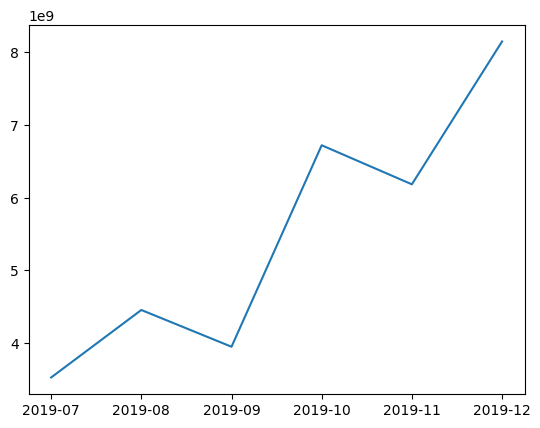

In [3]:
#cara 1 membuat plot GMV
import matplotlib.pyplot as plt

plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

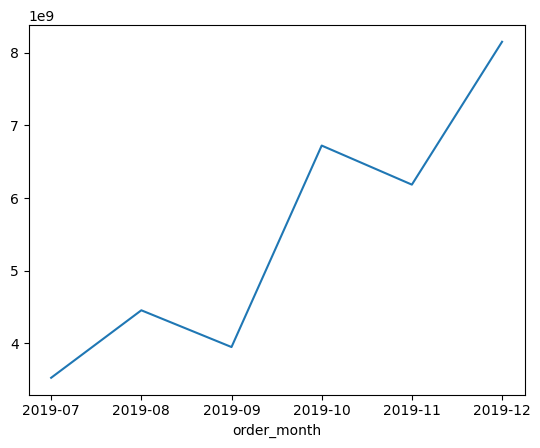

In [4]:
#cara 2 membuat plot GMV
import matplotlib.pyplot as plt

dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

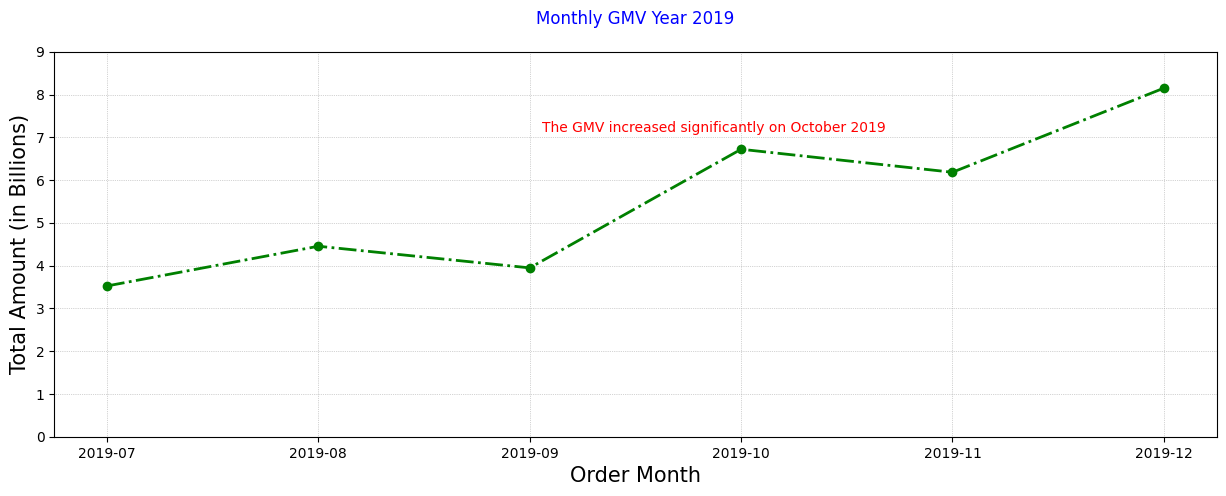

In [5]:
#memodifikasi tampilan grafik
import matplotlib.pylab as plt

fig = plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45, 0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('monthly_gmv.png')
plt.show()

color: mengubah warnanya (sama seperti di title)
linewidth: mengubah ketebalan line/garisnya (dalam satuan px)
linestyle: mengubah jenis dari garis. Misalnya '-' atau 'solid' untuk garis tak terputus (seperti pada default), '--' atau 'dashed' untuk garis putus-putus, ':' atau 'dotted' untuk garis berupa titik-titik, bisa juga '-.' atau ‘dashdot’ untuk garis dan titik bergantian.
marker: mengubah tipe points/titik data di chart. Ada banyak sekali kemungkinan nilai untuk marker ini, yang biasanya digunakan yaitu ‘.’ untuk bulatan kecil/titik, ‘o’ untuk bulatan agak besar, ‘s’ untuk persegi, ‘D’ untuk diamond/wajik, dan bentuk-bentuk lain seperti ‘+’, ‘x’, ‘|’, ‘*’.

loc: digunakan untuk menentukan posisi title, misalnya ‘left’ untuk membuat rata kiri, ‘right’ untuk rata kanan, dan ‘center’ untuk meletakkannya di tengah. Jika tidak didefinisikan, maka default-nya title ada di tengah.
pad: digunakan untuk menambahkan jarak antara judul ke grafik (dalam satuan px), misalnya kita tidak ingin judulnya terlalu menempel dengan grafiknya, jadi kita beri jarak.
fontsize: digunakan untuk mengganti ukuran font/huruf (dalam satuan px).
color: digunakan untuk mengganti warna huruf judul. Kita bisa menggunakan warna dasar dengan kata seperti ‘blue’, ‘red’, ‘orange’, dsb. Bisa juga dengan hex string, misalnya '#42DDF5' untuk warna biru muda.

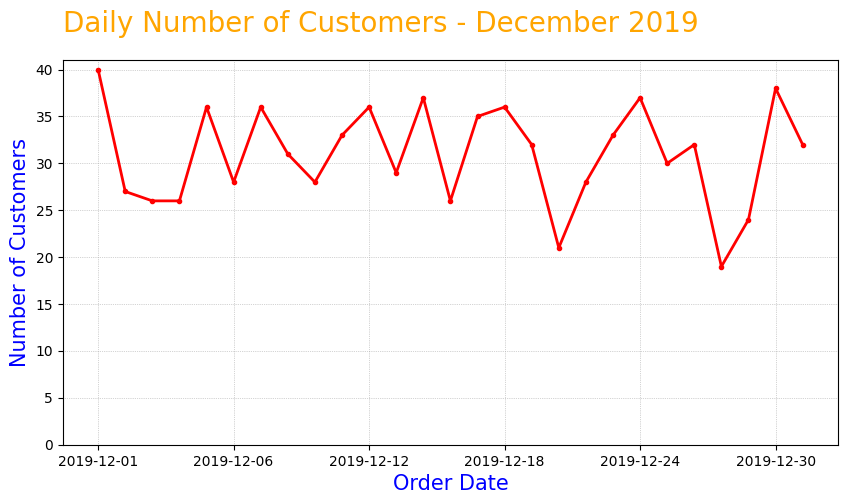

In [6]:
# Import library yang dibutuhkan
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv
dataset = pd.read_csv('retail_raw_reduced.csv')
# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=20, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()